In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('credit_score.csv')

In [3]:
# Explore dataset structure
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1000, 87)

Column names:
['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME', 'R_HOUSING_SAVINGS', 'R_

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [4]:
# Select relevant columns
# Features: income, debt, savings, credit_score, and T_*_6 columns (6-month transaction features)
# Target: Default

# Get all columns matching pattern T_*_6
t_6_columns = [col for col in df.columns if col.startswith('T_') and col.endswith('_6')]
feature_columns = ['INCOME', 'DEBT', 'SAVINGS', 'CREDIT_SCORE'] + t_6_columns
target_column = 'DEFAULT'

print(f"Selected T_*_6 columns ({len(t_6_columns)}): {t_6_columns}")
print(f"\nAll features ({len(feature_columns)}): {feature_columns}")
print(f"\nTarget: {target_column}")

# Create feature matrix and target vector
X = df[feature_columns]
y = df[target_column]

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts(normalize=True)}")

Selected T_*_6 columns (12): ['T_CLOTHING_6', 'T_EDUCATION_6', 'T_ENTERTAINMENT_6', 'T_FINES_6', 'T_GAMBLING_6', 'T_GROCERIES_6', 'T_HEALTH_6', 'T_HOUSING_6', 'T_TAX_6', 'T_TRAVEL_6', 'T_UTILITIES_6', 'T_EXPENDITURE_6']

All features (16): ['INCOME', 'DEBT', 'SAVINGS', 'CREDIT_SCORE', 'T_CLOTHING_6', 'T_EDUCATION_6', 'T_ENTERTAINMENT_6', 'T_FINES_6', 'T_GAMBLING_6', 'T_GROCERIES_6', 'T_HEALTH_6', 'T_HOUSING_6', 'T_TAX_6', 'T_TRAVEL_6', 'T_UTILITIES_6', 'T_EXPENDITURE_6']

Target: DEFAULT

X shape: (1000, 16)
y shape: (1000,)

Target distribution:
DEFAULT
0    0.716
1    0.284
Name: proportion, dtype: float64


In [5]:
# Check for missing values
print("Missing values:")
print(X.isnull().sum())
print(f"\nTarget missing values: {y.isnull().sum()}")

Missing values:
INCOME               0
DEBT                 0
SAVINGS              0
CREDIT_SCORE         0
T_CLOTHING_6         0
T_EDUCATION_6        0
T_ENTERTAINMENT_6    0
T_FINES_6            0
T_GAMBLING_6         0
T_GROCERIES_6        0
T_HEALTH_6           0
T_HOUSING_6          0
T_TAX_6              0
T_TRAVEL_6           0
T_UTILITIES_6        0
T_EXPENDITURE_6      0
dtype: int64

Target missing values: 0


In [6]:
# Split data into train (60%), validation (20%), and test (20%)
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% of temp is train (60% of total), 25% of temp is val (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"\nValidation target distribution:\n{y_val.value_counts(normalize=True)}")
print(f"\nTest target distribution:\n{y_test.value_counts(normalize=True)}")

Train set: 600 samples (60.0%)
Validation set: 200 samples (20.0%)
Test set: 200 samples (20.0%)

Train target distribution:
DEFAULT
0    0.716667
1    0.283333
Name: proportion, dtype: float64

Validation target distribution:
DEFAULT
0    0.715
1    0.285
Name: proportion, dtype: float64

Test target distribution:
DEFAULT
0    0.715
1    0.285
Name: proportion, dtype: float64


In [7]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete!")

Training Random Forest model...
Training complete!


In [8]:
# Evaluate on validation set
y_val_pred = rf_model.predict(X_val)
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("="*60)
print("VALIDATION SET PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba):.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_val_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_val, y_val_pred)}")

VALIDATION SET PERFORMANCE

Accuracy: 0.7150
ROC-AUC Score: 0.6490

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       143
           1       0.50      0.19      0.28        57

    accuracy                           0.71       200
   macro avg       0.62      0.56      0.55       200
weighted avg       0.67      0.71      0.67       200


Confusion Matrix:
[[132  11]
 [ 46  11]]


In [9]:
# Evaluate on test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("="*60)
print("TEST SET PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

TEST SET PERFORMANCE

Accuracy: 0.6950
ROC-AUC Score: 0.6538

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       143
           1       0.40      0.14      0.21        57

    accuracy                           0.69       200
   macro avg       0.56      0.53      0.51       200
weighted avg       0.63      0.69      0.64       200


Confusion Matrix:
[[131  12]
 [ 49   8]]


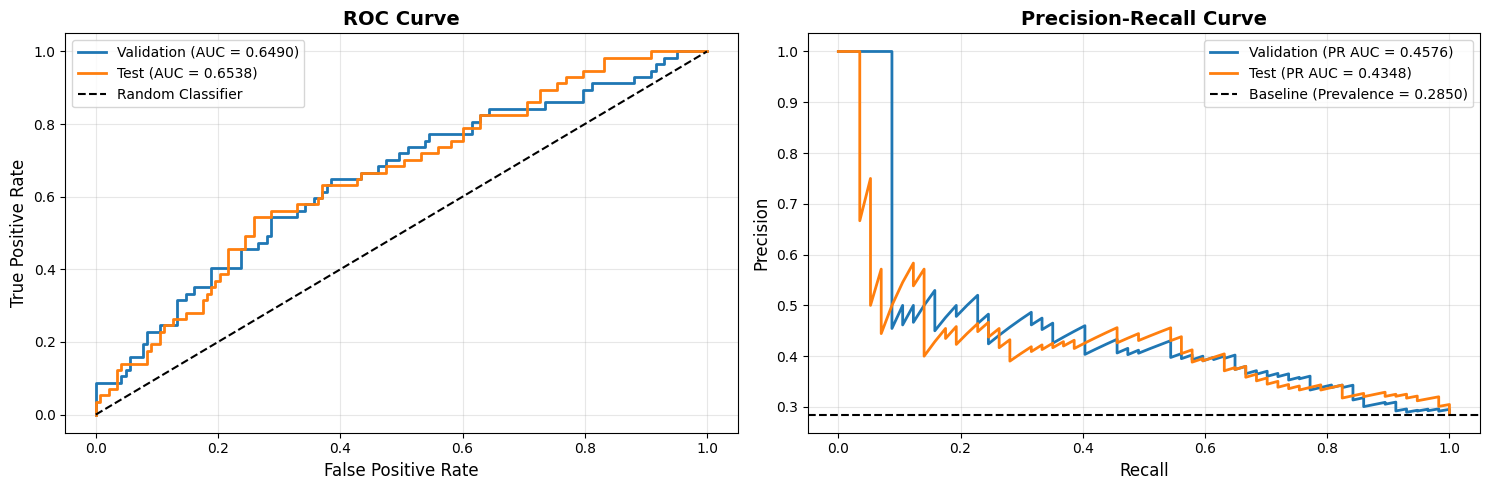


PR AUC Scores:
Validation: 0.4576
Test: 0.4348


In [20]:
# Plot ROC and PR curves
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ROC Curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

axes[0].plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_score(y_val, y_val_pred_proba):.4f})', linewidth=2)
axes[0].plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, y_test_pred_proba):.4f})', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Precision-Recall Curve
precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_pred_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc_val = average_precision_score(y_val, y_val_pred_proba)
pr_auc_test = average_precision_score(y_test, y_test_pred_proba)

axes[1].plot(recall_val, precision_val, label=f'Validation (PR AUC = {pr_auc_val:.4f})', linewidth=2)
axes[1].plot(recall_test, precision_test, label=f'Test (PR AUC = {pr_auc_test:.4f})', linewidth=2)
axes[1].axhline(y=y_test.mean(), color='k', linestyle='--', label=f'Baseline (Prevalence = {y_test.mean():.4f})')
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPR AUC Scores:")
print(f"Validation: {pr_auc_val:.4f}")
print(f"Test: {pr_auc_test:.4f}")

Top 10 Most Important Features:
              feature  importance
3        CREDIT_SCORE    0.191685
1                DEBT    0.101456
6   T_ENTERTAINMENT_6    0.074912
10         T_HEALTH_6    0.074194
15    T_EXPENDITURE_6    0.067642
14      T_UTILITIES_6    0.059234
9       T_GROCERIES_6    0.059020
2             SAVINGS    0.057616
4        T_CLOTHING_6    0.056751
0              INCOME    0.055922


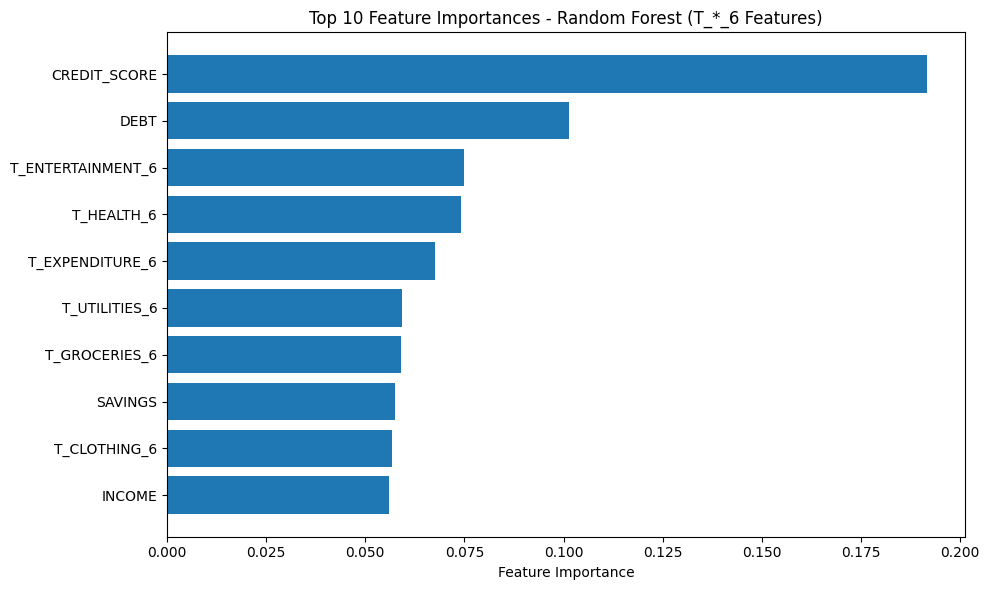

In [10]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(10)[::-1], 
         feature_importance['importance'].head(10)[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest (T_*_6 Features)')
plt.tight_layout()
plt.show()

In [19]:
# Optional: Try Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training Gradient Boosting model...")
gb_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_gb = gb_model.predict(X_val)
y_val_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

print("\nGradient Boosting - Validation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_gb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba_gb):.4f}")

Training Gradient Boosting model...

Gradient Boosting - Validation Set Performance:
Accuracy: 0.7250
ROC-AUC Score: 0.6743
